In [1]:
import pandas as pd
import numpy as np

origin_data = pd.read_csv('../../data/schoolinfo.csv', encoding='gbk')
offical_data = pd.read_excel('../../data/经济人口信息.xlsx')

In [3]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

from pyecharts.charts import Bar,Pie,Geo,Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType,ChartType
from pyecharts.render import make_snapshot
from snapshot_pyppeteer import snapshot
from pyecharts.datasets import register_url

In [6]:
area = ['义乌市', '余杭区', '海曙区', '西湖区', '德清县']
bar = (
    Bar(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
    .add_xaxis(area)
    .add_yaxis("幼儿园",[len(origin_data[origin_data['qxmc']==x][origin_data['dj']=='学前教育']) for x in area])
    .add_yaxis("小学",[len(origin_data[origin_data['qxmc']==x][origin_data['dj']=='初等教育']) for x in area])
    .add_yaxis("中学",[len(origin_data[origin_data['qxmc']==x][origin_data['dj']=='中等教育']) for x in area])
)
pie = (
    Pie()
    .add(
        series_name="学校占比",
        data_pair=[
            ["幼儿园", len(origin_data[origin_data['dj']=='学前教育'])],
            ["小学", len(origin_data[origin_data['dj']=='初等教育'])],
            ["中学", len(origin_data[origin_data['dj']=='中等教育'])]
        ],
        center=["75%", "35%"],
        radius="28%"
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="item"),label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
bar.overlap(pie)
make_snapshot(snapshot, bar.render(), "bar.png", notebook=True)
bar.render_notebook()

/tmp/ipykernel_27180/3017394438.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .add_yaxis("幼儿园",[len(origin_data[origin_data['qxmc']==x][origin_data['dj']=='学前教育']) for x in area])
/tmp/ipykernel_27180/3017394438.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .add_yaxis("小学",[len(origin_data[origin_data['qxmc']==x][origin_data['dj']=='初等教育']) for x in area])
/tmp/ipykernel_27180/3017394438.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .add_yaxis("中学",[len(origin_data[origin_data['qxmc']==x][origin_data['dj']=='中等教育']) for x in area])


In [5]:
try:
    register_url("https://echarts-maps.github.io/echarts-china-counties-js/")
except Exception:
    import ssl

    ssl._create_default_https_context = ssl._create_unverified_context
    register_url("https://echarts-maps.github.io/echarts-china-counties-js/")

In [6]:
c = Geo(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
origin_data['value']=1
for index,loc in origin_data.iterrows():
    c.add_coordinate(name = loc['name'], longitude=float(loc['point_x']), latitude=float(loc['point_y']))
geo = (
    c
    .add_schema(maptype="杭州市西湖区")
    .add(
        "幼儿园",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='学前教育']['name'], 
        origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='学前教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "小学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='初等教育']['name'], 
        origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='初等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "中学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='中等教育']['name'], 
        origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='中等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts()
)

make_snapshot(snapshot, geo.render(), "geo1.png", notebook=True)
geo.render_notebook()

/tmp/ipykernel_15104/721089985.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='学前教育']['name'],
/tmp/ipykernel_15104/721089985.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='学前教育']['value'])],
/tmp/ipykernel_15104/721089985.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='初等教育']['name'],
/tmp/ipykernel_15104/721089985.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='西湖区'][origin_data['dj']=='初等教育']['value'])],
/tmp/ipykernel_15104/721089985.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='西湖区'][orig

In [7]:
c = Geo(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
origin_data['value']=1
for index,loc in origin_data.iterrows():
    c.add_coordinate(name = loc['name'], longitude=float(loc['point_x']), latitude=float(loc['point_y']))
geo = (
    c
    .add_schema(maptype="余杭区")
    .add(
        "幼儿园",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='学前教育']['name'], 
        origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='学前教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "小学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='初等教育']['name'], 
        origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='初等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "中学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='中等教育']['name'], 
        origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='中等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts()
)

make_snapshot(snapshot, geo.render(), "geo2.png", notebook=True)
geo.render_notebook()

/tmp/ipykernel_15104/349541668.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='学前教育']['name'],
/tmp/ipykernel_15104/349541668.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='学前教育']['value'])],
/tmp/ipykernel_15104/349541668.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='初等教育']['name'],
/tmp/ipykernel_15104/349541668.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='余杭区'][origin_data['dj']=='初等教育']['value'])],
/tmp/ipykernel_15104/349541668.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='余杭区'][orig

In [8]:
c = Geo(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
origin_data['value']=1
for index,loc in origin_data.iterrows():
    c.add_coordinate(name = loc['name'], longitude=float(loc['point_x']), latitude=float(loc['point_y']))
geo = (
    c
    .add_schema(maptype="德清县")
    .add(
        "幼儿园",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='学前教育']['name'], 
        origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='学前教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "小学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='初等教育']['name'], 
        origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='初等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "中学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='中等教育']['name'], 
        origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='中等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts()
)

make_snapshot(snapshot, geo.render(), "geo3.png", notebook=True)
geo.render_notebook()

/tmp/ipykernel_15104/172010274.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='学前教育']['name'],
/tmp/ipykernel_15104/172010274.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='学前教育']['value'])],
/tmp/ipykernel_15104/172010274.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='初等教育']['name'],
/tmp/ipykernel_15104/172010274.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='德清县'][origin_data['dj']=='初等教育']['value'])],
/tmp/ipykernel_15104/172010274.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='德清县'][orig

In [9]:
c = Geo(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
origin_data['value']=1
for index,loc in origin_data.iterrows():
    c.add_coordinate(name = loc['name'], longitude=float(loc['point_x']), latitude=float(loc['point_y']))
geo = (
    c
    .add_schema(maptype="海曙区")
    .add(
        "幼儿园",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='学前教育']['name'], 
        origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='学前教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "小学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='初等教育']['name'], 
        origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='初等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "中学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='中等教育']['name'], 
        origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='中等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts()
)

make_snapshot(snapshot, geo.render(), "geo4.png", notebook=True)
geo.render_notebook()

/tmp/ipykernel_15104/1195212187.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='学前教育']['name'],
/tmp/ipykernel_15104/1195212187.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='学前教育']['value'])],
/tmp/ipykernel_15104/1195212187.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='初等教育']['name'],
/tmp/ipykernel_15104/1195212187.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='海曙区'][origin_data['dj']=='初等教育']['value'])],
/tmp/ipykernel_15104/1195212187.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='海曙区']

In [10]:
c = Geo(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
origin_data['value']=1
for index,loc in origin_data.iterrows():
    c.add_coordinate(name = loc['name'], longitude=float(loc['point_x']), latitude=float(loc['point_y']))
geo = (
    c
    .add_schema(maptype="义乌市")
    .add(
        "幼儿园",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='学前教育']['name'], 
        origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='学前教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "小学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='初等教育']['name'], 
        origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='初等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .add(
        "中学",
        [list(z) for z in zip(origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='中等教育']['name'], 
        origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='中等教育']['value'])],
        type_=ChartType.SCATTER,
        symbol_size=6,
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts()
)

make_snapshot(snapshot, geo.render(), "geo5.png", notebook=True)
geo.render_notebook()

/tmp/ipykernel_15104/2701228338.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='学前教育']['name'],
/tmp/ipykernel_15104/2701228338.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='学前教育']['value'])],
/tmp/ipykernel_15104/2701228338.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='初等教育']['name'],
/tmp/ipykernel_15104/2701228338.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  origin_data[origin_data['qxmc']=='义乌市'][origin_data['dj']=='初等教育']['value'])],
/tmp/ipykernel_15104/2701228338.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [list(z) for z in zip(origin_data[origin_data['qxmc']=='义乌市']

In [11]:
line = (
    Line(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=offical_data['年份'])
    .add_yaxis(
        series_name='幼儿数(万人)',
        y_axis=offical_data['幼儿数(万人)'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='小学生数(万人)',
        y_axis=offical_data['小学生数(万人)'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='中学生数(万人)',
        y_axis=offical_data['中学生数(万人)'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)

make_snapshot(snapshot, line.render(), "line1.png", notebook=True)
line.render_notebook()

In [12]:
line = (
    Line(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=offical_data['年份'])
    .add_yaxis(
        series_name='幼儿园数',
        y_axis=offical_data['幼儿园数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='小学数',
        y_axis=offical_data['小学数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='中学数',
        y_axis=offical_data['中学数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)
make_snapshot(snapshot, line.render(), "line2.png", notebook=True)
line.render_notebook()

In [4]:
line = (
    Line(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=offical_data['年份'])
    .add_yaxis(
        series_name='幼儿园平均教职工数',
        y_axis=offical_data['幼儿园平均教职工数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='小学平均教职工数',
        y_axis=offical_data['小学平均教职工数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='中学平均教职工数',
        y_axis=offical_data['中学平均教职工数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)
make_snapshot(snapshot, line.render(), "line4.png", notebook=True)
line.render_notebook()

In [3]:
line = (
    Line(init_opts=opts.InitOpts(theme = ThemeType.VINTAGE))
    .add_xaxis(xaxis_data=offical_data['年份'])
    .add_yaxis(
        series_name='幼儿园平均人数',
        y_axis=offical_data['幼儿园平均人数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='小学平均人数',
        y_axis=offical_data['小学平均人数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name='中学平均人数',
        y_axis=offical_data['中学平均人数'],
        symbol="emptyCircle",
        is_symbol_show=True,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)
make_snapshot(snapshot, line.render(), "line3.png", notebook=True)
line.render_notebook()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']

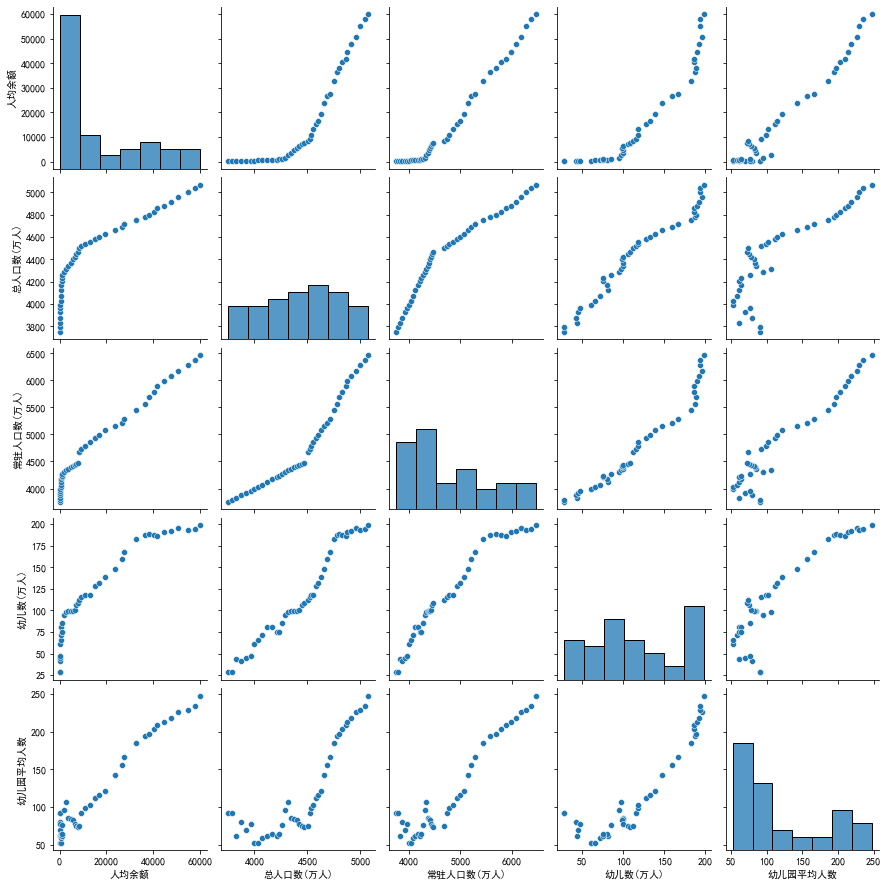

In [14]:
sns.pairplot(offical_data[['人均余额', '总人口数(万人)', '常驻人口数(万人)', '幼儿数(万人)', '幼儿园平均人数']])

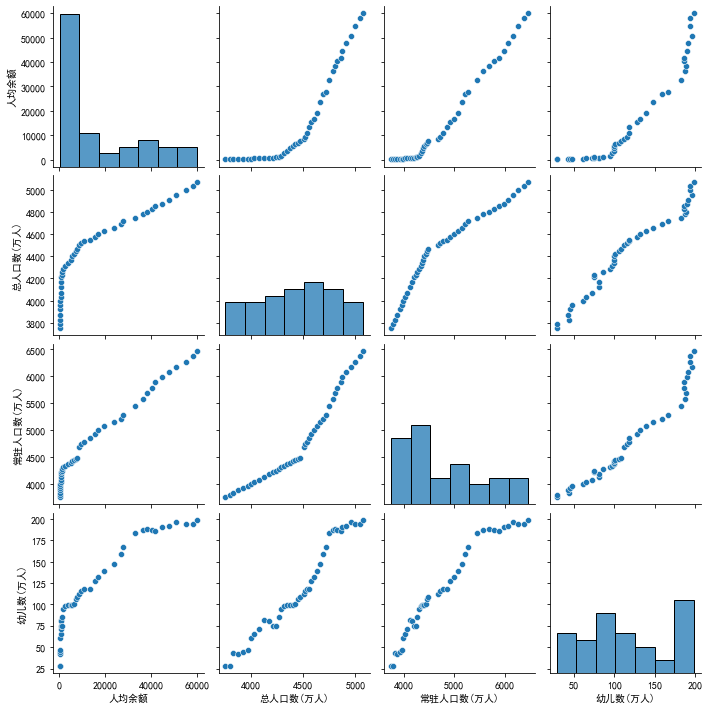

In [11]:
sns.pairplot(offical_data[['人均余额', '总人口数(万人)', '常驻人口数(万人)', '幼儿数(万人)']])

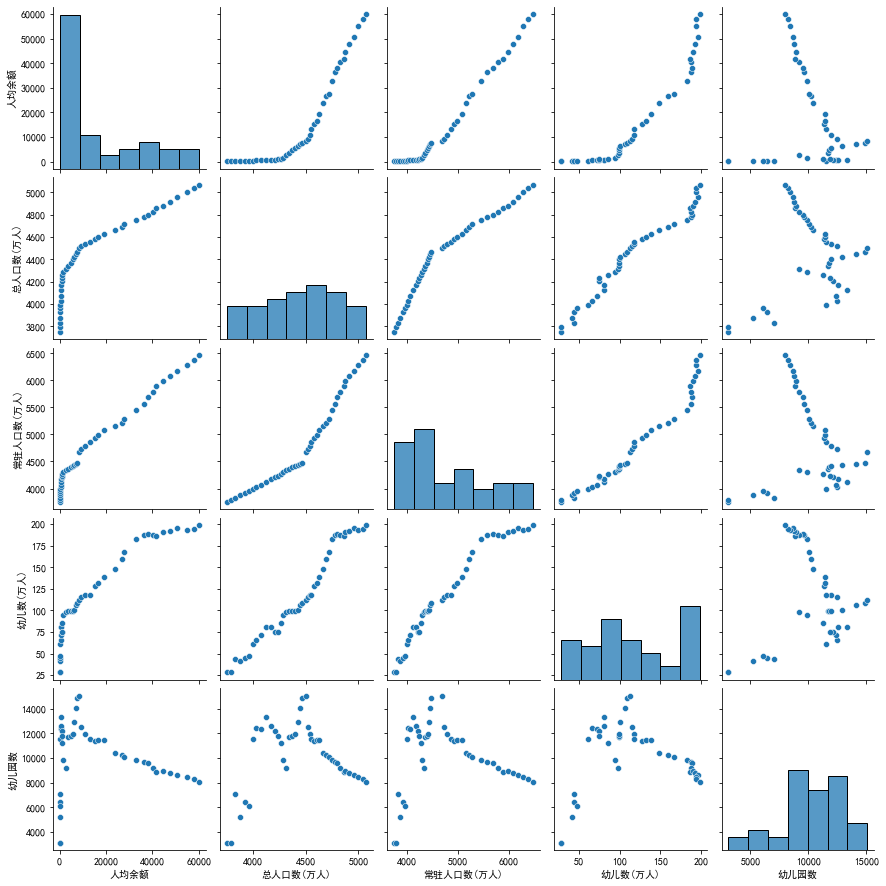

In [13]:
sns.pairplot(offical_data[['人均余额', '总人口数(万人)', '常驻人口数(万人)', '幼儿数(万人)', '幼儿园数']])

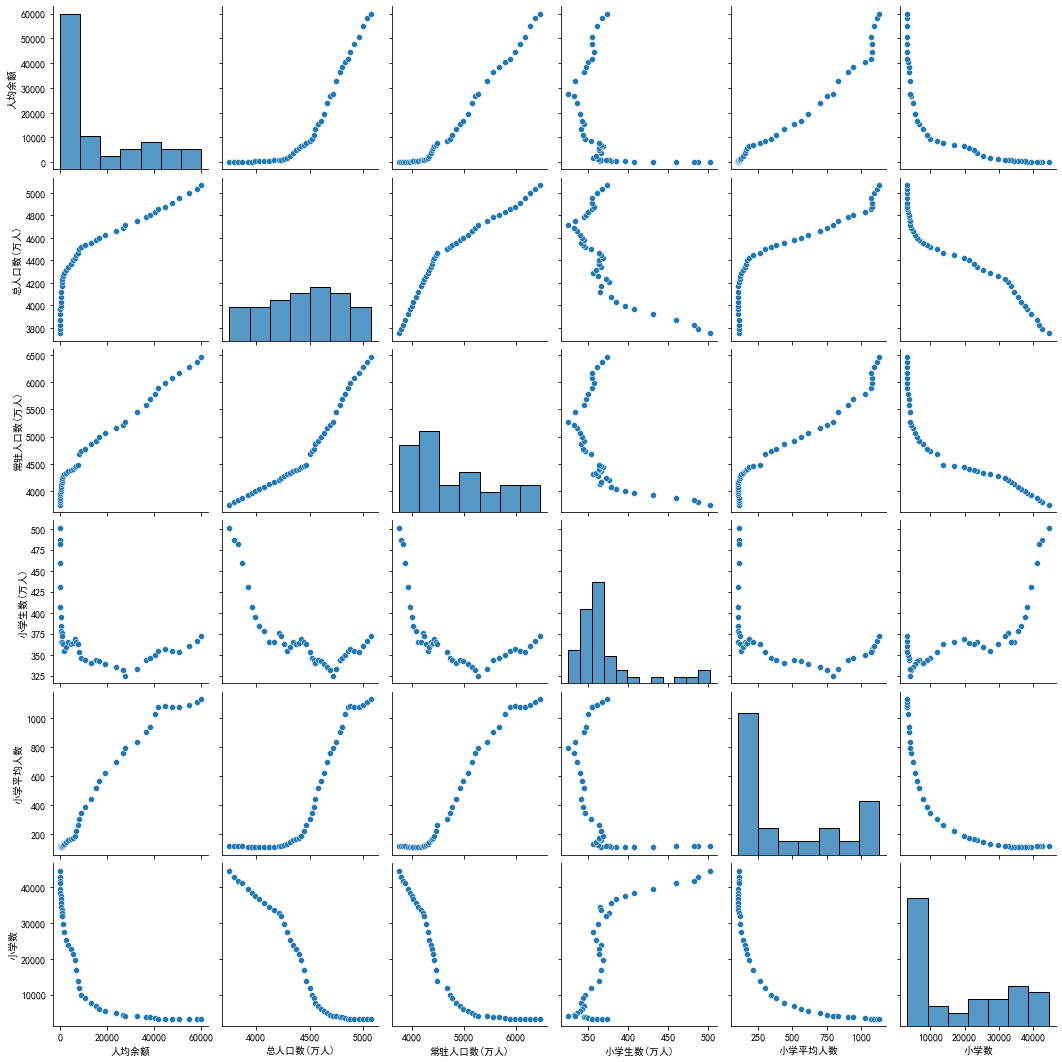

In [15]:
sns.pairplot(offical_data[['人均余额', '总人口数(万人)', '常驻人口数(万人)', '小学生数(万人)', '小学平均人数', '小学数']])

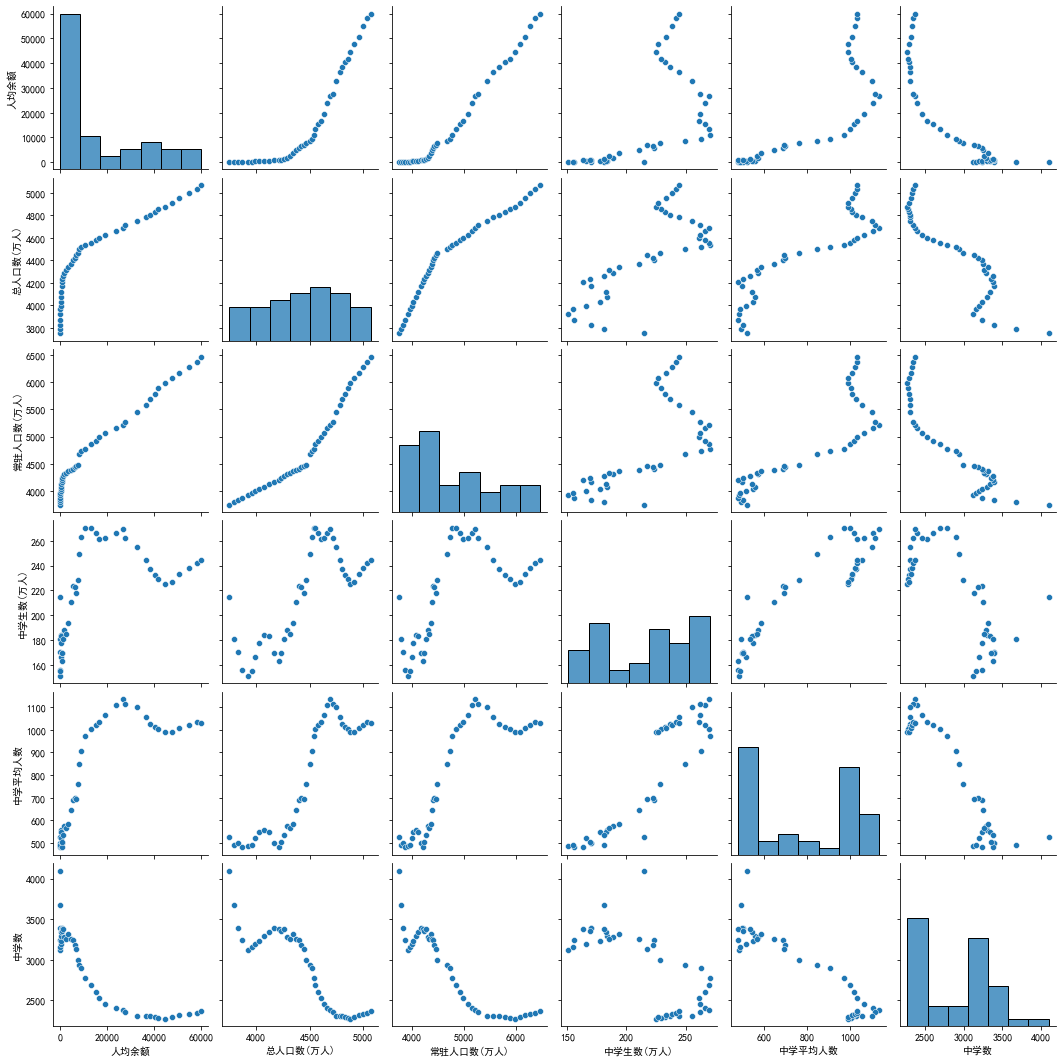

In [16]:
sns.pairplot(offical_data[['人均余额', '总人口数(万人)', '常驻人口数(万人)', '中学生数(万人)', '中学平均人数', '中学数']])

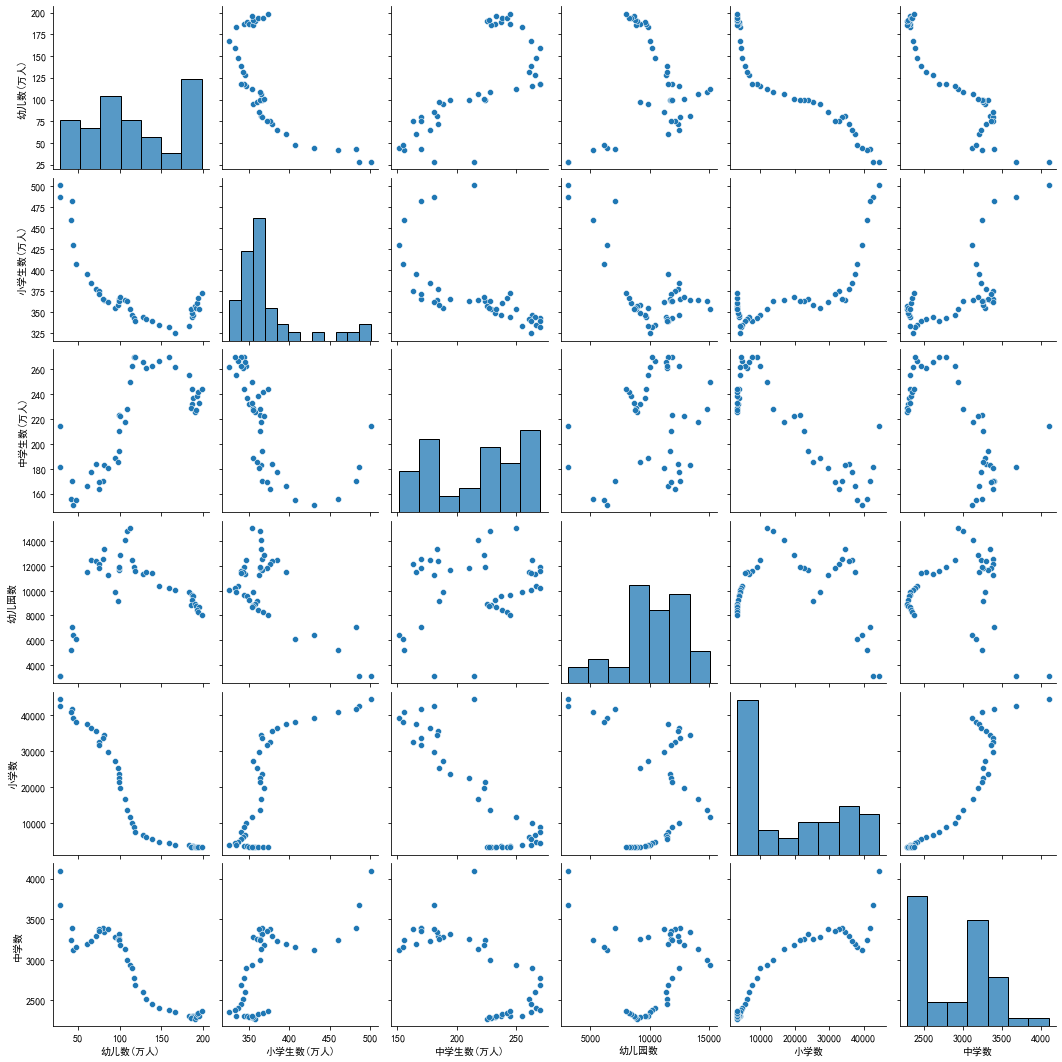

In [12]:
sns.pairplot(offical_data[[ '幼儿数(万人)', '小学生数(万人)', '中学生数(万人)', '幼儿园数', '小学数', '中学数']])

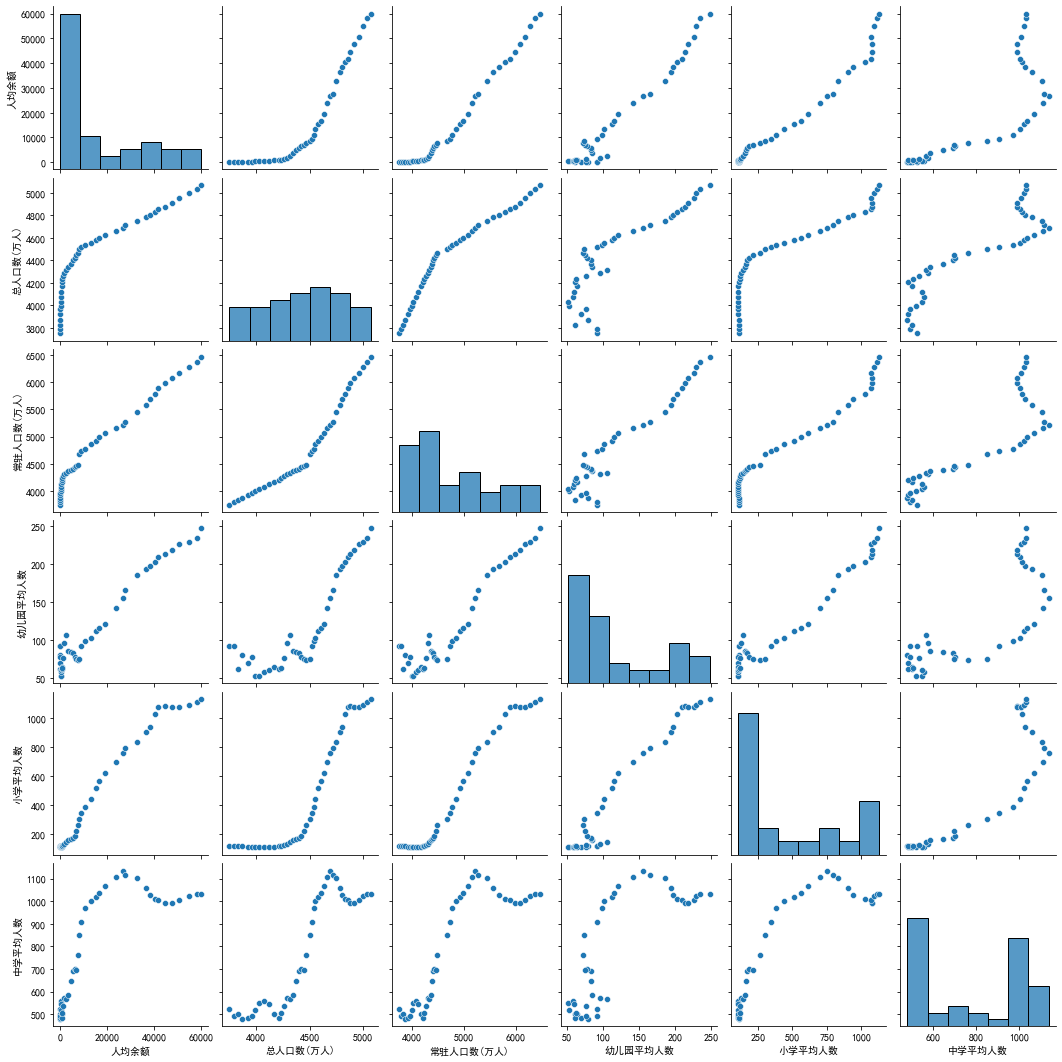

In [5]:
sns.pairplot(offical_data[[ '人均余额', '总人口数(万人)', '常驻人口数(万人)', '幼儿园平均人数', '小学平均人数', '中学平均人数']])